In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib.font_manager import FontProperties

In [80]:
# 导入数据
corn = loadmat('./data/NIRcorn.mat')
corn.keys()

dict_keys(['__header__', '__version__', '__globals__', 'm5spec', 'cornspect', 'cornwavelength', 'propvals', 'cornprop', 'NIRcoin', 'information', 'mp5spec', 'mp6spec', 'm5nbs', 'mp5nbs', 'mp6nbs'])

随便选取了一个cornspect矩阵，但这个矩阵似乎选的很差，八十个奇异值只有能选择四五个

In [81]:
corn['cornspect']

array([[0.0444948, 0.0443834, 0.0442581, ..., 0.731327 , 0.730944 ,
        0.730594 ],
       [0.0465041, 0.0463485, 0.0462297, ..., 0.727786 , 0.727504 ,
        0.72703  ],
       [0.0469579, 0.046817 , 0.0466632, ..., 0.706597 , 0.706122 ,
        0.705967 ],
       ...,
       [0.0497173, 0.0495729, 0.0494713, ..., 0.748217 , 0.747987 ,
        0.747532 ],
       [0.0594381, 0.0593211, 0.0592224, ..., 0.736457 , 0.736197 ,
        0.735732 ],
       [0.0500851, 0.0499276, 0.0498294, ..., 0.728992 , 0.728863 ,
        0.728245 ]])

# 计算cornspect矩阵的svd分解 #

In [82]:
# m=80,n=700
np.shape(corn['cornspect'])

(80, 700)

In [83]:
# svd分解
u, s, v = np.linalg.svd(corn['cornspect'])

In [84]:
u

array([[-0.10766221, -0.06177376, -0.06744657, ..., -0.09342727,
        -0.0324975 , -0.00651338],
       [-0.10711772, -0.04489301, -0.15271354, ...,  0.02690004,
         0.02617888, -0.01656111],
       [-0.10430976, -0.03152467, -0.14416564, ...,  0.03943292,
         0.18991331, -0.05905533],
       ...,
       [-0.11283817,  0.10640211, -0.14700306, ..., -0.06433914,
         0.09890731, -0.07471134],
       [-0.1116692 ,  0.16278927, -0.2605115 , ...,  0.05356606,
        -0.0683183 , -0.00545901],
       [-0.11015854,  0.13282234, -0.14622347, ..., -0.05612056,
         0.0995325 ,  0.04456304]])

In [85]:
# m×m的矩阵
np.shape(u)

(80, 80)

In [86]:
s

array([1.02189403e+02, 1.31555098e+00, 2.86300023e-01, 2.06647672e-01,
       1.23320160e-01, 1.01962901e-01, 8.44201029e-02, 5.95557353e-02,
       4.87776936e-02, 3.59610431e-02, 2.65651573e-02, 2.43821148e-02,
       1.67820830e-02, 1.43876982e-02, 1.18457855e-02, 1.09519847e-02,
       8.60348511e-03, 7.60123007e-03, 6.26677951e-03, 5.49703459e-03,
       4.62195443e-03, 4.30313933e-03, 4.10671864e-03, 3.34783768e-03,
       3.12820935e-03, 2.93179213e-03, 2.71602632e-03, 2.63444134e-03,
       2.21754084e-03, 2.06739281e-03, 2.03560931e-03, 1.81664919e-03,
       1.80753370e-03, 1.66393383e-03, 1.51039776e-03, 1.47712972e-03,
       1.44003794e-03, 1.36589013e-03, 1.33998417e-03, 1.28325843e-03,
       1.22271657e-03, 1.19984693e-03, 1.17138061e-03, 1.09763253e-03,
       1.07197149e-03, 1.03856084e-03, 1.00076446e-03, 9.80288950e-04,
       9.71646266e-04, 9.52059694e-04, 9.08703117e-04, 8.85455892e-04,
       8.58611010e-04, 8.45916029e-04, 8.22717212e-04, 8.20617083e-04,
      

In [87]:
# m×n的矩阵，但对角线以外的0和80列之后的0被省略了，显示长度为80的一维数组，即80个奇异值
np.shape(s)

(80,)

In [88]:
v

array([[-0.00403511, -0.00402106, -0.00401253, ..., -0.0655987 ,
        -0.06557121, -0.06553583],
       [ 0.02575335,  0.02576878,  0.02578561, ..., -0.101072  ,
        -0.10088717, -0.10098831],
       [-0.09460057, -0.09412392, -0.09395736, ..., -0.10754175,
        -0.10817194, -0.10786906],
       ...,
       [-0.02684543,  0.04946046,  0.05568483, ...,  0.55597715,
        -0.14069446, -0.02302742],
       [-0.05426379,  0.01742776,  0.08685229, ..., -0.13204769,
         0.49585694, -0.16757625],
       [-0.06998284, -0.04016291,  0.08569621, ..., -0.03255652,
        -0.16420087,  0.37470294]])

In [89]:
# n×n的矩阵
np.shape(v)

(700, 700)

# 计算cornspect矩阵的协方差矩阵 #

In [90]:
covariance = np.cov(corn['cornspect'])

In [91]:
covariance

array([[0.03229906, 0.03195112, 0.03104011, ..., 0.03267672, 0.03180767,
        0.0316798 ],
       [0.03195112, 0.03160735, 0.03070605, ..., 0.03232432, 0.03146423,
        0.03133758],
       [0.03104011, 0.03070605, 0.02983194, ..., 0.03140558, 0.03057055,
        0.03044687],
       ...,
       [0.03267672, 0.03232432, 0.03140558, ..., 0.03308453, 0.03220488,
        0.03207659],
       [0.03180767, 0.03146423, 0.03057055, ..., 0.03220488, 0.03134975,
        0.03122449],
       [0.0316798 , 0.03133758, 0.03044687, ..., 0.03207659, 0.03122449,
        0.0311009 ]])

In [92]:
np.shape(covariance)

(80, 80)

# 计算协方差矩阵的特征值和特征向量

In [93]:
eigenvalue, eigenvector = np.linalg.eig(covariance)

In [94]:
# 80个特征值
eigenvalue

array([2.72837842e+00, 7.71787353e-04, 7.15488923e-05, 2.23924417e-05,
       1.49861829e-05, 1.05734995e-05, 5.10911649e-06, 3.93034486e-06,
       3.02712469e-06, 1.21668622e-06, 8.61407997e-07, 4.19582782e-07,
       2.97774849e-07, 2.16764469e-07, 1.86212764e-07, 1.20712817e-07,
       9.37486325e-08, 5.64432556e-08, 4.33779312e-08, 3.66081460e-08,
       2.69579894e-08, 2.49932768e-08, 1.68545347e-08, 1.47107632e-08,
       1.23878632e-08, 1.06465606e-08, 1.00825883e-08, 8.55863718e-09,
       6.15123078e-09, 5.96000235e-09, 4.67620680e-09, 4.88409464e-09,
       3.98131682e-09, 3.38627110e-09, 3.12147936e-09, 2.99884197e-09,
       2.71402022e-09, 2.57620906e-09, 2.40337098e-09, 2.18727236e-09,
       2.07648189e-09, 1.97149144e-09, 1.73159020e-09, 1.64487540e-09,
       1.57837122e-09, 1.43473611e-09, 1.39488554e-09, 1.35444176e-09,
       1.31096550e-09, 1.20455937e-09, 1.17442476e-09, 1.12111400e-09,
       1.03126337e-09, 2.88447957e-10, 3.04547223e-10, 3.28749141e-10,
      

In [95]:
np.shape(eigenvalue)

(80,)

In [96]:
# 每一个特征值对应特征向量矩阵的一列向量
eigenvector

array([[-1.08793064e-01,  8.41860728e-02, -2.48123197e-02, ...,
         6.47496103e-02, -1.24439851e-01, -3.28447159e-02],
       [-1.07619127e-01,  9.38118118e-02,  2.37143074e-02, ...,
         1.43929072e-01,  2.79677298e-02,  4.06551690e-02],
       [-1.04556707e-01,  7.58397408e-02,  2.79874604e-02, ...,
         1.79372396e-02, -4.54478381e-02,  1.09099961e-02],
       ...,
       [-1.10104497e-01, -7.56759555e-02,  2.31141989e-01, ...,
         1.07580929e-01, -1.25207928e-01, -1.85339566e-01],
       [-1.07178673e-01, -8.15791137e-02,  1.74041317e-01, ...,
        -1.75079849e-03, -5.51375237e-02,  1.81981689e-02],
       [-1.06749193e-01, -9.41051824e-02,  1.66696248e-01, ...,
        -4.01465783e-02,  1.20520113e-02,  1.05220266e-04]])

In [97]:
np.shape(eigenvector)

(80, 80)

# 计算协方差矩阵的奇异值分解结果

In [222]:
u3, singularvalue,v3 = np.linalg.svd(covariance)
singularvalue

array([2.72837842e+00, 7.71787353e-04, 7.15488923e-05, 2.23924417e-05,
       1.49861829e-05, 1.05734995e-05, 5.10911649e-06, 3.93034486e-06,
       3.02712469e-06, 1.21668622e-06, 8.61407997e-07, 4.19582782e-07,
       2.97774849e-07, 2.16764469e-07, 1.86212764e-07, 1.20712817e-07,
       9.37486325e-08, 5.64432556e-08, 4.33779312e-08, 3.66081460e-08,
       2.69579894e-08, 2.49932768e-08, 1.68545347e-08, 1.47107632e-08,
       1.23878632e-08, 1.06465606e-08, 1.00825883e-08, 8.55863719e-09,
       6.15123078e-09, 5.96000235e-09, 4.88409463e-09, 4.67620681e-09,
       3.98131683e-09, 3.38627109e-09, 3.12147934e-09, 2.99884197e-09,
       2.71402023e-09, 2.57620906e-09, 2.40337098e-09, 2.18727236e-09,
       2.07648190e-09, 1.97149145e-09, 1.73159019e-09, 1.64487540e-09,
       1.57837122e-09, 1.43473611e-09, 1.39488554e-09, 1.35444175e-09,
       1.31096550e-09, 1.20455937e-09, 1.17442476e-09, 1.12111398e-09,
       1.03126336e-09, 9.99358506e-10, 9.65716908e-10, 9.22470854e-10,
      

In [223]:
singularvalue-eigenvalue

array([-3.99680289e-15, -5.74627151e-18,  2.20906193e-18,  5.49554976e-18,
       -1.55345843e-18, -1.68051337e-18,  6.08254359e-18,  7.28448335e-20,
       -4.23092957e-19, -1.00076943e-18, -6.44274436e-19,  2.33331107e-18,
        4.60198294e-18, -8.88603736e-18, -1.26296054e-17,  6.09651964e-18,
        2.49250562e-17,  3.63304342e-19, -1.63120017e-20, -1.42129151e-17,
       -4.88976239e-19, -4.11256333e-18,  4.13846401e-18,  8.22072276e-18,
        8.58309570e-18,  2.43054946e-18,  1.35403676e-18,  1.07130097e-17,
        2.60478100e-18,  4.98360354e-18,  2.07887839e-10, -2.07887831e-10,
        8.71305901e-18, -1.03876899e-17, -1.88266415e-17,  8.36101755e-19,
        6.00821397e-18,  2.09923633e-18, -7.51046909e-20,  5.55081122e-18,
        1.15075754e-17,  9.75480117e-18, -7.30885457e-18,  7.18764531e-19,
        1.32695693e-19, -2.57087321e-19, -1.74642643e-18, -6.32874584e-18,
       -8.58918292e-19,  7.93933949e-19, -2.12836074e-18, -2.19561968e-17,
       -5.75427387e-18,  

# 通关绘图直观比较奇异值特征值

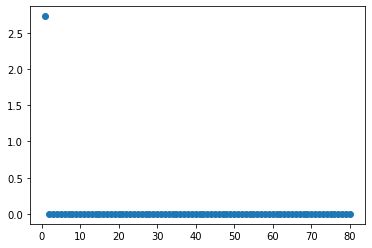

In [135]:
plt.figure(1)

x1 = np.linspace(1,80,80)
y1 = eigenvalue
plt.scatter(x1,y1)

plt.show()

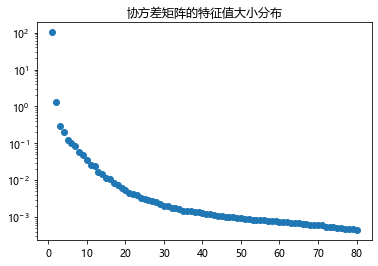

In [220]:
# 由于y轴数据大小相差太大，采用取对数
plt.figure(2)

x2 = np.linspace(1,80,80)
y2 = s
# plt.ylim(0,150)
plt.scatter(x2,y2)
plt.yscale('log')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.title("协方差矩阵的特征值大小分布")

"""
在10的负一次方和负二次方间的数就已经小到可以忽略了
同理选择前四至六个奇异值

"""
plt.show()

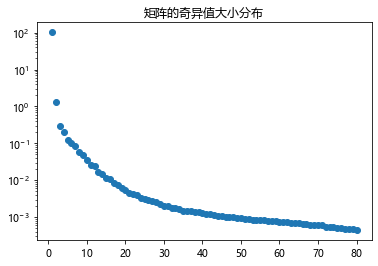

In [153]:
# 同理观察奇异值大小
plt.figure(2)

x2 = np.linspace(1,80,80)
y2 = s

plt.scatter(x2,y2)
plt.yscale('log')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.title("矩阵的奇异值大小分布")

"""
在10的负一次方和负二次方间的数就已经小到可以忽略了
也就是选择前四至六个特征值的特征向量分别作为行向量组成特征向量矩阵P实现PCA算法
即基于特征值分解协方差矩阵实现PCA算法
"""
plt.show()

# 比较奇异值与特征值

In [160]:
# cornspect矩阵的80个奇异值
s

array([1.02189403e+02, 1.31555098e+00, 2.86300023e-01, 2.06647672e-01,
       1.23320160e-01, 1.01962901e-01, 8.44201029e-02, 5.95557353e-02,
       4.87776936e-02, 3.59610431e-02, 2.65651573e-02, 2.43821148e-02,
       1.67820830e-02, 1.43876982e-02, 1.18457855e-02, 1.09519847e-02,
       8.60348511e-03, 7.60123007e-03, 6.26677951e-03, 5.49703459e-03,
       4.62195443e-03, 4.30313933e-03, 4.10671864e-03, 3.34783768e-03,
       3.12820935e-03, 2.93179213e-03, 2.71602632e-03, 2.63444134e-03,
       2.21754084e-03, 2.06739281e-03, 2.03560931e-03, 1.81664919e-03,
       1.80753370e-03, 1.66393383e-03, 1.51039776e-03, 1.47712972e-03,
       1.44003794e-03, 1.36589013e-03, 1.33998417e-03, 1.28325843e-03,
       1.22271657e-03, 1.19984693e-03, 1.17138061e-03, 1.09763253e-03,
       1.07197149e-03, 1.03856084e-03, 1.00076446e-03, 9.80288950e-04,
       9.71646266e-04, 9.52059694e-04, 9.08703117e-04, 8.85455892e-04,
       8.58611010e-04, 8.45916029e-04, 8.22717212e-04, 8.20617083e-04,
      

In [159]:
# cornspect矩阵的协方差矩阵的80个特征值
eigenvalue

array([2.72837842e+00, 7.71787353e-04, 7.15488923e-05, 2.23924417e-05,
       1.49861829e-05, 1.05734995e-05, 5.10911649e-06, 3.93034486e-06,
       3.02712469e-06, 1.21668622e-06, 8.61407997e-07, 4.19582782e-07,
       2.97774849e-07, 2.16764469e-07, 1.86212764e-07, 1.20712817e-07,
       9.37486325e-08, 5.64432556e-08, 4.33779312e-08, 3.66081460e-08,
       2.69579894e-08, 2.49932768e-08, 1.68545347e-08, 1.47107632e-08,
       1.23878632e-08, 1.06465606e-08, 1.00825883e-08, 8.55863718e-09,
       6.15123078e-09, 5.96000235e-09, 4.67620680e-09, 4.88409464e-09,
       3.98131682e-09, 3.38627110e-09, 3.12147936e-09, 2.99884197e-09,
       2.71402022e-09, 2.57620906e-09, 2.40337098e-09, 2.18727236e-09,
       2.07648189e-09, 1.97149144e-09, 1.73159020e-09, 1.64487540e-09,
       1.57837122e-09, 1.43473611e-09, 1.39488554e-09, 1.35444176e-09,
       1.31096550e-09, 1.20455937e-09, 1.17442476e-09, 1.12111400e-09,
       1.03126337e-09, 2.88447957e-10, 3.04547223e-10, 3.28749141e-10,
      

# 分析range和span

In [165]:
A = corn['cornspect']
A

array([[0.0444948, 0.0443834, 0.0442581, ..., 0.731327 , 0.730944 ,
        0.730594 ],
       [0.0465041, 0.0463485, 0.0462297, ..., 0.727786 , 0.727504 ,
        0.72703  ],
       [0.0469579, 0.046817 , 0.0466632, ..., 0.706597 , 0.706122 ,
        0.705967 ],
       ...,
       [0.0497173, 0.0495729, 0.0494713, ..., 0.748217 , 0.747987 ,
        0.747532 ],
       [0.0594381, 0.0593211, 0.0592224, ..., 0.736457 , 0.736197 ,
        0.735732 ],
       [0.0500851, 0.0499276, 0.0498294, ..., 0.728992 , 0.728863 ,
        0.728245 ]])

In [166]:
np.shape(A)

(80, 700)

<font size=4>y = A·x<br>
x、y都是向量，A与x的内积得到列向量y，y的取值范围就是range</font>

In [219]:
# 例子
# range1
x = np.random.rand(1,700).reshape(-1,1)
y1 = np.dot(A,x)
y1

array([[128.03332007],
       [127.54370956],
       [124.26481516],
       [121.27231772],
       [140.37351143],
       [139.49924303],
       [140.38261683],
       [142.68182895],
       [124.63201986],
       [128.71794684],
       [156.09001215],
       [153.30608409],
       [126.98618788],
       [129.97994894],
       [149.23259144],
       [154.27147998],
       [136.34397515],
       [142.67067994],
       [138.59164865],
       [143.62679802],
       [136.70523873],
       [143.5905323 ],
       [143.63178471],
       [143.57894114],
       [140.08993948],
       [134.83538605],
       [151.80747492],
       [151.64647492],
       [149.59652753],
       [117.75427253],
       [119.16531988],
       [129.25207798],
       [131.0691392 ],
       [141.68326016],
       [144.05089946],
       [120.20642967],
       [118.71816637],
       [123.0856602 ],
       [119.80115949],
       [115.81338391],
       [117.50286691],
       [115.79937352],
       [116.84061257],
       [127

In [215]:
# 例子
# range2
x = np.random.rand(1,700).reshape(-1,1)
y2 = np.dot(A,x)
y2

array([[133.20820649],
       [132.71191557],
       [129.32187469],
       [126.18325459],
       [146.11835666],
       [145.18058689],
       [146.11685351],
       [148.51348659],
       [129.70993236],
       [133.95457522],
       [162.45364105],
       [159.53337027],
       [132.09669498],
       [135.22355325],
       [155.29056889],
       [160.53229663],
       [141.89484324],
       [148.44301844],
       [144.24246062],
       [149.46259431],
       [142.2289407 ],
       [149.4107453 ],
       [149.45710731],
       [149.40131265],
       [145.79817862],
       [140.29460754],
       [157.95715194],
       [157.78286558],
       [155.67687674],
       [122.4865873 ],
       [123.94875092],
       [134.47906081],
       [136.37069966],
       [147.39957497],
       [149.90103584],
       [125.05104414],
       [123.50689675],
       [128.05831489],
       [124.63553241],
       [120.45421665],
       [122.2313498 ],
       [120.48465399],
       [121.55803724],
       [132

<font size=4>A的700个列向量x<sub>1</sub>、x<sub>2</sub>、x<sub>3</sub>....x<sub>700</sub><br>
取任意数量的向量经过组合得到的向量空间称为span
比如x<sub>0</sub>=c<sub>1</sub>x<sub>1</sub>+c<sub>2</sub>x<sub>2</sub>+c<sub>3</sub>x<sub>3</sub>就是span</font>

In [194]:
# 例子
# 取三个列向量生成span
x3 = A[:,2]
x7 = A[:,6]
x9 = A[:,8]

In [201]:
# 随机生成组合的权数
c = np.random.rand(1,3)
c1 = c[0][0]
c2 = c[0][1]
c3 = c[0][2]

# span1
xx = c1*x1+c2*x2+c3*x3
xx

array([ 0.45842837,  0.90593843,  1.35305136,  1.7996758 ,  2.24885726,
        2.69537377,  3.14357028,  3.59044979,  4.0355276 ,  4.48265313,
        4.93099533,  5.37805812,  5.82114952,  6.26852413,  6.71865762,
        7.16595219,  7.61108096,  8.0576974 ,  8.5048747 ,  8.95254324,
        9.39876899,  9.84629057, 10.29379477, 10.74052569, 11.18723968,
       11.63321204, 12.08274087, 12.52971272, 12.97671927, 13.41823404,
       13.86527252, 14.31456165, 14.76131775, 15.20965156, 15.6576396 ,
       16.10147181, 16.54873098, 16.99646298, 17.44280245, 17.88886329,
       18.33696244, 18.78349483, 19.23074858, 19.67990747, 20.12689434,
       20.57795045, 21.02507319, 21.46819243, 21.9148385 , 22.36098171,
       22.80893169, 23.255459  , 23.7028334 , 24.14671503, 24.59358171,
       25.04066326, 25.48916514, 25.93631042, 26.38314749, 26.83144521,
       27.27757631, 27.72502786, 28.17300544, 28.61775776, 29.0655584 ,
       29.51079105, 29.95980016, 30.40624696, 30.85391424, 31.30

In [202]:
# 随机生成组合的权数
c = np.random.rand(1,3)
c1 = c[0][0]
c2 = c[0][1]
c3 = c[0][2]

# span2
xy = c1*x1+c2*x2+c3*x3
xy

array([ 0.43645439,  0.86358616,  1.29037884,  1.71675442,  2.14531332,
        2.57159675,  2.99931465,  3.42590803,  3.85096301,  4.27776645,
        4.70560876,  5.13235862,  5.55571752,  5.98273364,  6.41210542,
        6.8390532 ,  7.26415171,  7.69052046,  8.1173681 ,  8.54463519,
        8.97067036,  9.39781196,  9.82493873, 10.25140523, 10.67785727,
       11.10367608, 11.53253159, 11.9592038 , 12.38590565, 12.80791834,
       13.23464746, 13.66329829, 14.08978628, 14.51762142, 14.94516132,
       15.36915275, 15.7960703 , 16.22339158, 16.64952384, 17.07541819,
       17.50305295, 17.92934994, 18.35626286, 18.78480249, 19.21148754,
       19.64164711, 20.06844816, 20.49183083, 20.91822489, 21.34418957,
       21.77169697, 22.19798962, 22.62500556, 23.04903919, 23.47562161,
       23.9023875 , 24.33036614, 24.75718644, 25.18374358, 25.61154789,
       26.03750224, 26.46458406, 26.89211502, 27.31689209, 27.74427197,
       28.16945917, 28.59787091, 29.02409482, 29.45136083, 29.87

In [203]:
# 随机生成组合的权数
c = np.random.rand(1,3)
c1 = c[0][0]
c2 = c[0][1]
c3 = c[0][2]

# span3
xz = c1*x1+c2*x2+c3*x3
xz

array([ 0.80305508,  1.5771033 ,  2.35009645,  3.12179183,  3.90028047,
        4.67168912,  5.44756103,  6.21993407,  6.98752048,  7.7605471 ,
        8.5368061 ,  9.30966603, 10.07197514, 10.84566351, 11.62668143,
       12.40015714, 13.16787896, 13.93955307, 14.71271723, 15.48718649,
       16.25782268, 17.03190149, 17.80593414, 18.57791241, 19.34984568,
       20.11980866, 20.8992202 , 21.67183854, 22.44454907, 23.20266949,
       23.97546488, 24.75423957, 25.52628472, 26.30252143, 27.0778395 ,
       27.84211669, 28.61549837, 29.39013624, 30.16107452, 30.93127259,
       31.70688582, 32.47833666, 33.25170393, 34.03013262, 34.80279088,
       35.58625994, 36.35927915, 37.12166221, 37.89341507, 38.66383195,
       39.43904891, 40.21048623, 40.98417405, 41.74858254, 42.52092148,
       43.29383129, 44.07051449, 44.84359358, 45.61585385, 46.39199466,
       47.16237937, 47.93627215, 48.71156244, 49.47828413, 50.25310433,
       51.0211021 , 51.79913287, 52.57035631, 53.34482221, 54.11

# 以mp6nbs为例分析怎么取出数据，并进行相关计算

In [104]:
corn.keys()

dict_keys(['__header__', '__version__', '__globals__', 'm5spec', 'cornspect', 'cornwavelength', 'propvals', 'cornprop', 'NIRcoin', 'information', 'mp5spec', 'mp6spec', 'm5nbs', 'mp5nbs', 'mp6nbs'])

In [105]:
np.shape(corn['mp6nbs'])

(1, 1)

In [106]:
mp6nbs = corn['mp6nbs']

In [107]:
mp6nbs

array([[(array(['mp6nbs'], dtype='<U6'), array(['data'], dtype='<U4'), array([], dtype='<U1'), array([[2005.   ,    5.   ,   13.   ,    9.   ,   52.   ,   10.126]]), array([[2005.   ,    5.   ,   13.   ,    9.   ,   52.   ,   16.095]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[0.0540352, 0.0523974, 0.0505351, ..., 0.0205688, 0.0214708,
                0.0223628],
               [0.0538763, 0.052227 , 0.0503497, ..., 0.0209743, 0.0218709,
                0.0227737],
               [0.0523787, 0.0506936, 0.0487596, ..., 0.0211716, 0.0220692,
                0.0229549],
               [0.0531089, 0.0514445, 0.0495416, ..., 0.0210523, 0.0219529,
                0.0228439]]), array([[array([], dtype='<U1'), array([], dtype='<U1')],
               [array([], dtype='<U1'), array([], dtype='<U1')]], dtype=object), array([[array([], shape=(0, 0), dtype=uint8), array([], dtype='<U1')],
               [array([[1100, 1102, 1104, 1106, 1108, 1110, 1112, 11

In [108]:
mp6nbs['data']

array([[array([[0.0540352, 0.0523974, 0.0505351, ..., 0.0205688, 0.0214708,
                0.0223628],
               [0.0538763, 0.052227 , 0.0503497, ..., 0.0209743, 0.0218709,
                0.0227737],
               [0.0523787, 0.0506936, 0.0487596, ..., 0.0211716, 0.0220692,
                0.0229549],
               [0.0531089, 0.0514445, 0.0495416, ..., 0.0210523, 0.0219529,
                0.0228439]])                                               ]],
      dtype=object)

In [109]:
print(mp6nbs['data'][0][0])

[[0.0540352 0.0523974 0.0505351 ... 0.0205688 0.0214708 0.0223628]
 [0.0538763 0.052227  0.0503497 ... 0.0209743 0.0218709 0.0227737]
 [0.0523787 0.0506936 0.0487596 ... 0.0211716 0.0220692 0.0229549]
 [0.0531089 0.0514445 0.0495416 ... 0.0210523 0.0219529 0.0228439]]


In [110]:
np.shape(mp6nbs['data'][0][0])

(4, 700)

In [111]:
# 对mp6nbs里的data数据进行svd分解
mp6nbs_data = mp6nbs['data'][0][0]
u2, s2, v2 = np.linalg.svd(mp6nbs_data)

In [112]:
u2

array([[-0.50211953, -0.52327743,  0.68573793,  0.06180773],
       [-0.50079662, -0.34717759, -0.58321056, -0.53715539],
       [-0.49799925,  0.77105691,  0.25140502, -0.30702363],
       [-0.49907461,  0.10545   , -0.35556216,  0.78318604]])

In [113]:
np.shape(u2)

(4, 4)

In [114]:
s2

array([3.98934455e+00, 2.66422265e-02, 5.56243694e-03, 1.53899713e-03])

In [115]:
np.shape(s2)

(4,)

In [116]:
v2

array([[-0.02674701, -0.02591526, -0.02496571, ..., -0.01049846,
        -0.01094926, -0.01139689],
       [-0.03726236, -0.03895874, -0.04142208, ...,  0.0187476 ,
         0.01888998,  0.01876558],
       [-0.01482946, -0.01358133, -0.01210835, ..., -0.05220403,
        -0.05201151, -0.05362604],
       ...,
       [-0.01182543,  0.05336684, -0.01481417, ...,  0.99677356,
        -0.00320745, -0.00331181],
       [-0.01218924,  0.05312368, -0.01438229, ..., -0.00321176,
         0.99680089, -0.00329727],
       [-0.01275792,  0.05452198, -0.01559769, ..., -0.00331036,
        -0.00329148,  0.99660145]])

In [117]:
np.shape(v2)

(700, 700)

In [118]:
np.trace(mp6nbs_data)

0.2027222